# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

**Общая информация о проекте**
В первой части этого проекта были подготовлены данные для дальнейшей работы с ними. Пропуски были заполнены; неправильные значения были изменены на те, которые можно использовать в расчетах; для удобства были добавлены новые классификации для клиентов по уровню дохода, а также классификация по целям, на которые берут займ. 
Во второй части будут подготовлены ответы на вопросы поставленные к этим данным. Это вопросы как о зависимости между данными, так и о природе этих данных. 
Поставленные вопросы: 
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?
- Приведите возможные причины появления пропусков в исходных данных.


#### Импорт дополнительных библиотек и проверка данных, которые мы будем дополнительно использовать

Далее нам потребуется библиотека seaborn и matplotlib.pyplot для удобного представления результатов. 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

Также сразу установим единый стиль для графиков, а также для результатов вывода. 

In [23]:
# установим единый стиль для графиков
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = 0.5, rc={"grid.linewidth": 1})
# установим единый формат для вывода данных
pd.options.display.float_format = '{:,.2f}'.format

Получим количество случаев с существующей, либо ранее отмеченной задолженностью. 
В столбце представлены данные в числовых значениях: '0' — задолженности нет, '1' — задолженность есть, либо была ранее.

In [24]:
# посчитаем количество уникальных значений в столбце 'debt' - задолженность 
data['debt'].value_counts()

0    19599
1     1732
Name: debt, dtype: int64

Из общего количества клиентов — 21525, 1732 — имеют, либо имели задолженность. Эта информация понадобится нам далее. 

##### Создадим функцию, к которой будем обращаться для получения данных для подсчета зависимостей. 

In [25]:
def pivot_table_ref (series_name):
    try:
        df_get = data.pivot_table(index=series_name, values='dob_years', columns='debt', aggfunc='count')
        df_get = data.pivot_table(index=series_name, values='debt', aggfunc=['sum', 'count', 'mean']).reset_index()
        df_get['mean'] = df_get['mean']*100
        return df_get
    except:
        return print('Проверьте название столбца, по которому должен проводиться анализ')


#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

Чтобы получить ответ на этот вопрос, нам нужно будет проанализировать клиентов с задолженностью, в разрезе наличия и количества детей.

In [27]:
# получаем dataframe с сортировкой по столбцу 'children'
children_debt_df = pivot_table_ref('children')
try:
    # добавим разметку для полученных данных
    children_debt_df = children_debt_df.set_axis(['Количество детей', 'Количество должников', 'Клиентов в категории', 'Процент просроченных платежей по категории'], axis='columns')
    # выведем результат
    children_debt_df = children_debt_df.sort_values(by='Количество детей', ascending=True) 
    display(children_debt_df)
except:
    print('С данными что-то не так, обратите на это внимание')

,Количество детей,Количество должников,Клиентов в категории,Процент просроченных платежей по категории
0,0,1063,14091,7.54
1,1,444,4808,9.23
2,2,194,2052,9.45
3,3,27,330,8.18
4,4,4,41,9.76
5,5,0,9,0.00


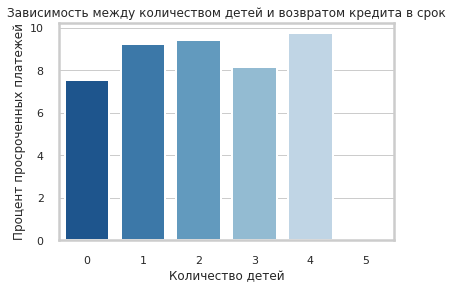

In [28]:
try:
    # используем для отображения результатов график зависимостей 
    sns_children_barplot_show = sns.barplot(y='Процент просроченных платежей по категории', x='Количество детей', data=children_debt_df, palette='Blues_r')
    sns_children_barplot_show.set(ylabel='Процент просроченных платежей', xlabel='Количество детей', title='Зависимость между количеством детей и возвратом кредита в срок')
    sns_children_barplot_show;
except:
    print('С данными что-то не так, обратите на это внимание')

**Вывод:** По полученным данным видно, что начиная с клиентов у которых нет детей и до клиентов с двумя детьми, искомые данные закономерно увеличиваются. При отсутствии детей процент просроченных платежей по категории приобретает значение — 7.54, при одном ребенке — 9.23, при двух — 9.45.

Можно было бы предположить, что при большем количестве детей сложнее возвращать кредит, но начиная с клиентов у которых три и более ребенка выборка становится достаточно мала и выводы по ней могут быть не достоверными. 

На текущий момент можно сделать вывод, что закономерности между количеством детей и склонностью задерживать выплаты по кредиту нет. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

Проверим то как сильно влияет семейное положение на способность клиентов возвращать займ в срок. 

In [30]:
try:
    # получаем dataframe с сортировкой по столбцу 'family_status'
    family_status_debt_df = pivot_table_ref('family_status')
    # добавим разметку для полученных данных
    family_status_debt_df = family_status_debt_df.set_axis(['Семейное положение', 'Количество должников', 'Клиентов в категории', 'Процент просроченных платежей по категории'], axis='columns')
    family_status_debt_df = family_status_debt_df.sort_values(by='Процент просроченных платежей по категории', ascending=True)
    # выведем результат 
    display(family_status_debt_df)
except:
    print('С данными что-то не так, обратите на это внимание')

,Семейное положение,Количество должников,Клиентов в категории,Процент просроченных платежей по категории
2,вдовец / вдова,63,951,6.62
1,в разводе,84,1189,7.06
4,женат / замужем,927,12261,7.56
3,гражданский брак,385,4134,9.31
0,Не женат / не замужем,273,2796,9.76


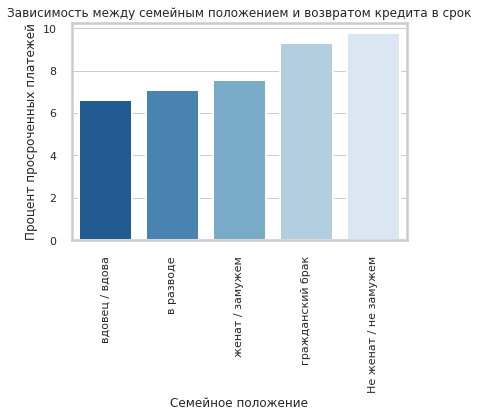

In [31]:
try:
    # используем для отображения результатов график зависимостей 
    plt.xticks(rotation=90)
    sns_family_status_barplot_show = sns.barplot(y='Процент просроченных платежей по категории', x='Семейное положение', data=family_status_debt_df, palette='Blues_r')
    sns_family_status_barplot_show.set(ylabel='Процент просроченных платежей', xlabel='Семейное положение', title='Зависимость между семейным положением и возвратом кредита в срок')
    sns_family_status_barplot_show;
except:
    print('С данными что-то не так, обратите на это внимание')

**Вывод:** По полученным данным видно, что некоторая зависимость между семейным положением и клиентами, которые задерживают выплаты есть. 

Предположим, что градация категорий происходит по наличию и отсутствию партнера; по официальному статусу отношений; по тому, были ли ранее отношения; и по обязательствам клиента в отношении своего партнера. 
Таким образом порядок будет следующий: 
1. Не женат/не замужем — партнера нет и не было, 
2. Гражданский брак — партнер есть, но обязательств между ним и клентом нет, 
3. Женат/замужем — партнер есть и обязательства между ними официально закреплены, 
4. В разводе — партнера уже нет, но обязательства между ними еще могут быть,  
5. Вдовец/вдова — партнера нет, но также нет и обязательств между ними. 

На основании этого, можно сделать вывод, что клиенты, которые свободны от любых отношений, хуже всего относятся к кредитным обязательствам, у них процент по просроченным кредитам — 0.098, но процент задолженности пропорционально уменьшается в зависимости от более сложных семейных отношений и достигает минимального значения 0.066 в категории вдовствующих клиентов. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

Проверим то, как сильно влияет уровень дохода клиентов на то, склонна ли эта категория клиентов задолжать или нет. 
Ранее мы подготовили данные и распределили клиентов с разным уровнем дохода в определенные категории А, В, С, D, E, где А - группа с наибольшим доходом, Е — группа с наименьшим. 
Далее будем опираться на эти категории и делить клиентов только по ним. 

In [33]:
try:
    # получаем dataframe с сортировкой по столбцу 'total_income_category'
    total_income_category_debt_df = pivot_table_ref('total_income_category')
    # добавим разметку для полученных данных
    total_income_category_debt_df = total_income_category_debt_df.set_axis(['Категория дохода клиента', 'Количество должников', 'Клиентов в категории', 'Процент просроченных платежей по категории'], axis='columns')
    total_income_category_debt_df = total_income_category_debt_df.sort_values(by='Категория дохода клиента', ascending=True) 
    # выведем результат
    display(total_income_category_debt_df)
except:
    print('С данными что-то не так, обратите на это внимание')

,Категория дохода клиента,Количество должников,Клиентов в категории,Процент просроченных платежей по категории
0,A,2,25,8.00
1,B,354,5014,7.06
2,C,1353,15921,8.50
3,D,21,349,6.02
4,E,2,22,9.09


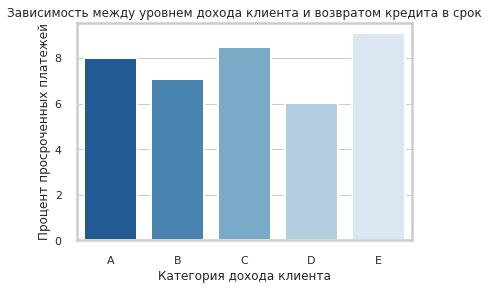

In [34]:
try:
    # используем для отображения результатов график зависимостей 
    sns_total_income_category_barplot_show = sns.barplot(y='Процент просроченных платежей по категории', x='Категория дохода клиента', data=total_income_category_debt_df, palette='Blues_r')
    sns_total_income_category_barplot_show.set(ylabel='Процент просроченных платежей', xlabel='Категория дохода клиента', title='Зависимость между уровнем дохода клиента и возвратом кредита в срок')
    sns_total_income_category_barplot_show;
except:
    print('С данными что-то не так, обратите на это внимание')

**Вывод:** По полученным данным сложно определить взаимосвязь между уровнем дохода клиента и возвратом кредита в срок. Вероятнее всего это обусловлено тем, что клиентов с максимальным уровнем дохода — А, а также с минимальными — D и E, сильно меньше и полученные данные не дают полного представления и возможностей для анализа. 

Скорее всего это связано с тем, что в изначальных данных был недостаток данных по заработку клиентов и пропущенные данные были заполнены медианным значением. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [35]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

Посмотрим на то, при каких целях кредита, процент по задолженностям будет выше.

In [36]:
try:
    # получаем dataframe с сортировкой по столбцу 'purpose_category'
    purpose_category_debt_df = pivot_table_ref('purpose_category')
    # добавим разметку для полученных данных
    purpose_category_debt_df = purpose_category_debt_df.set_axis(['Цели кредита', 'Количество должников', 'Клиентов в категории', 'Процент просроченных платежей по категории'], axis='columns')
    purpose_category_debt_df = purpose_category_debt_df.sort_values(by='Процент просроченных платежей по категории', ascending=True) 
    # выведем результат
    display(purpose_category_debt_df)
except:
    print('С данными что-то не так, обратите на это внимание')

,Цели кредита,Количество должников,Клиентов в категории,Процент просроченных платежей по категории
1,операции с недвижимостью,780,10751,7.26
3,проведение свадьбы,183,2313,7.91
2,получение образования,369,3988,9.25
0,операции с автомобилем,400,4279,9.35


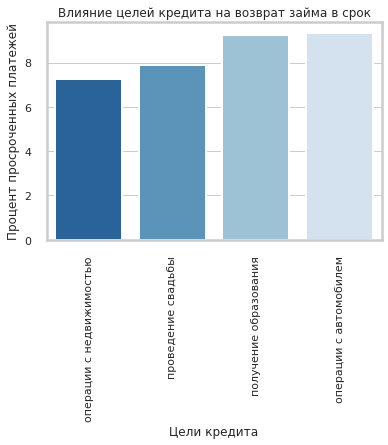

In [37]:
try:
    # используем для отображения результатов график зависимостей 
    plt.xticks(rotation=90)
    sns_purpose_category_barplot_show = sns.barplot(y='Процент просроченных платежей по категории', x='Цели кредита', data=purpose_category_debt_df, palette='Blues_r')
    sns_purpose_category_barplot_show.set(ylabel='Процент просроченных платежей', xlabel='Цели кредита', title='Влияние целей кредита на возврат займа в срок')
    sns_purpose_category_barplot_show;
except:
    print('С данными что-то не так, обратите на это внимание')

**Вывод:** Анализируя эти данные обратим внимание на то, что данные делятся на две группы, в которых значения максимально близки друг к другу. Так займ на недвижимость и на свадьбу имеют процент по просроченным платежам 7.26 и 7.91, а займ на образование и авто имеют 9.25 и 9.35 соответственно. 

Можно прийти к выводу, что на процент по выплатам влияет характер важности покупки для клиента. Из этих же данных можно выделить две основные группы по важности для клиента — это то, что клиент планирует оставить с собой на всю жизнь: недвижимость и семья, и то, что клиент может заменить в любой момент: образование и авто.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Количество пропусков, а также строки в которых есть пропуски в столбце о трудовом стаже и в столбце о доходах — совпадают, в каждом столбце пропущено по 2174 значения. Пропуски могли появиться по многим причинам, вот, например, некоторые из них: 
- Данные не были предоставлены заявителем, 
- Произошел технический сбой и данные не были записаны изначально или были повреждены,
- Данные могли быть удалены во время обработки сотрудниками, 
- Ошибки при обслуживании БД могли привести к частичной потере данных. 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* В иследуемых данных, пропуски составляли 10.1% от общего количества. В случае использования таких данных результат будет сильно искажен и чтобы не допустить таких проблем, мы заполняем пропуски медианными значениями. Медианное значение один из лучших вариантов, так как медиана является устойчивой мерой центральной тенденции и не чувствительна к наличию выбросов в данных, в отличие от среднего значения.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

В первой части проекта была выполнена важная работа по предварительной обработке данных. Были заполнены пропуски и исправлены неправильные значения. Были добавлены новые классификации для клиентов, что позволило лучше понять их профиль и цели кредитования. Это позволит далее провести более точный анализ данных и ответить на поставленные вопросы. Вторая часть проекта была посвящена анализу зависимостей между данными и изучению природы этих данных.

Во второй части были рассмотрены вопросы поставленные бизнесом. И можно сделать следующие выводы: 

1. Зависимость между количеством детей и возвратом кредита в срок не обнаружена. Процент просроченных платежей у клиентов без детей - 7,54%, у клиентов с одним ребенком - 9,23%, у клиентов с двумя детьми - 9,45%. При анализе выборки клиентов с тремя и более детьми выборка становится недостаточно большой для получения достоверных выводов.

2. Семейное положение оказывает влияние на возврат кредита в срок. Клиенты без партнера (не женат/не замужем) имеют наибольший процент просроченных кредитов (9,8%), тогда как вдовствующие клиенты имеют наименьший процент (6,6%). В градации между этими категориями процент просроченных кредитов пропорционально уменьшается. Категории в гражданском браке, женатых/замужних и в разводе имеют соответственно более низкие проценты просроченных кредитов.

3. Исходя из полученных данных, трудно сделать вывод о наличии связи между уровнем дохода и своевременным возвратом кредита. Это может быть связано с тем, что количество клиентов с очень высоким и очень низким доходами (категории A, D и E) недостаточно значительно для анализа и оценки полной картины.

4. Данные показывают, что займы на недвижимость и свадьбу имеют меньший процент просрочек, чем займы на образование и автомобиль. Это может объясняться тем, что для клиентов покупка недвижимости и свадьба являются важными жизненными событиями, которые они планируют сохранить на всю жизнь, в то время как образование и автомобиль можно заменить в любой момент.

Что касается вопросов, в которых недостаточно данных для корректного анализа. Результат, который можно было бы применить в решении бизнес-задач, гарантируется только при достаточно полном объеме данных, которые используются для анализа. 

Для анализа первого вопроса не хватило данных о семьях с тремя детьми и более, что дало не совсем корректный результат и как следствие невозможность использовать эти данные в работе. В этом случае, в будущем, рекомендуется делать выборку для анализа более масштабной, либо более отражающей долевое распределение клиентов по этому параметру. 

В третьем вопросе максимально выделяется группа со средним доходом и из-за этого корректно анализировать данные становится проблематично, это из-за того, что в изначальных данных был большой пропуск в данных по заработку клиентов и данные были заполнены медианным значением и вероятнее всего это привело к таким результатам. Во избежание подобного данные лучше всего хранить на надежных носителях и с ограниченным доступом, чтобы избежать как технических проблем, так и проблем человеческого фактора. 